In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("C:\\Users\\srvps\\Downloads\\adult (2).csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df = pd.read_csv("C:\\Users\\srvps\\Downloads\\adult (2).csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns = ['Age','Workclass','Fnlwgt','Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
df['Workclass'].nunique()

9

In [8]:
df['Education'].nunique()

16

In [9]:
df['Education'].nunique()

16

In [10]:
df['occupation'].nunique()

15

In [11]:
df['relationship'].nunique()

6

In [12]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [13]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [14]:
df['native_country'].nunique()

42

In [15]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [17]:
df['Workclass'] = lb.fit_transform(df['Workclass'])
df['marital_status'] = lb.fit_transform(df['marital_status'])
df['relationship'] = lb.fit_transform(df['relationship'])
df['race'] = lb.fit_transform(df['race'])
df['sex'] = lb.fit_transform(df['sex'])
df['income'] = lb.fit_transform(df['income'])

In [18]:
df.dtypes

Age                int64
Workclass          int32
Fnlwgt             int64
Education         object
education_num      int64
marital_status     int32
occupation        object
relationship       int32
race               int32
sex                int32
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income             int32
dtype: object

In [19]:
df['Workclass'].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1298
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

In [20]:
df['marital_status'].value_counts()

2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: marital_status, dtype: int64

In [21]:
df['relationship'].value_counts()

0    13193
1     8305
3     5068
4     3446
5     1568
2      981
Name: relationship, dtype: int64

In [22]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

#### Excluding columns
1) Education<br>
2) occupation<br>
3) native_country<br>

In [23]:
x = df.iloc[:,[0,1,2,4,5,7,8,9,10,11,12]]
y = df['income']
print(x.shape)
print(y.shape)

(32561, 11)
(32561,)


In [24]:
x.head()

,Age,Workclass,Fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,39,7,77516,13,4,1,4,1,2174,0,40
1,50,6,83311,13,2,0,4,1,0,0,13
2,38,4,215646,9,0,1,4,1,0,0,40
3,53,4,234721,7,2,0,2,1,0,0,40
4,28,4,338409,13,2,5,2,0,0,0,40


In [25]:
x.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
education_num     int64
marital_status    int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
dtype: object

In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [27]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(24420, 11)
(8141, 11)
(24420,)
(8141,)


In [28]:
x_tr.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
education_num     int64
marital_status    int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
dtype: object

#### Model-1

In [29]:
def apply_model(model):
    model.fit(x_tr,y_tr)
    print('Accuracy',model.score(x_te,y_te))
    ypred = model.predict(x_te)
    print('Predicted values\n',ypred)
    cm = confusion_matrix(y_te,ypred)
    print('Confusion Matrix\n',cm)
    sns.heatmap(cm,annot=True)
    plt.show()
    print('Classification report\n',classification_report(y_te,ypred))

Accuracy 0.8438766736273186
Predicted values
 [0 0 0 ... 1 0 0]
Confusion Matrix
 [[5825  306]
 [ 965 1045]]


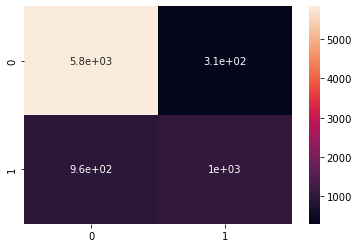

Classification report
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      6131
           1       0.77      0.52      0.62      2010

    accuracy                           0.84      8141
   macro avg       0.82      0.73      0.76      8141
weighted avg       0.84      0.84      0.83      8141



In [30]:
# a) Decision Tree
m1 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=15)
apply_model(m1)

Accuracy 0.8491585800270237
Predicted values
 [0 0 0 ... 1 0 0]
Confusion Matrix
 [[5886  245]
 [ 983 1027]]


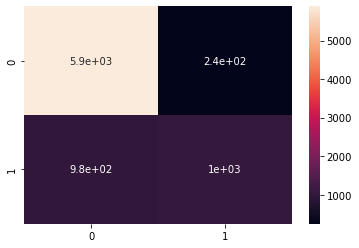

Classification report
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      6131
           1       0.81      0.51      0.63      2010

    accuracy                           0.85      8141
   macro avg       0.83      0.74      0.77      8141
weighted avg       0.84      0.85      0.84      8141



In [31]:
#b) Random Forest Classifier
m2 = RandomForestClassifier(n_estimators=40,criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m2)

Accuracy 0.7908119395651639
Predicted values
 [0 0 0 ... 1 0 0]
Confusion Matrix
 [[5907  224]
 [1479  531]]


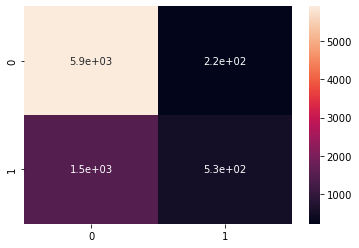

Classification report
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      6131
           1       0.70      0.26      0.38      2010

    accuracy                           0.79      8141
   macro avg       0.75      0.61      0.63      8141
weighted avg       0.78      0.79      0.75      8141



In [32]:
#c) Logistic Regression
m3 = LogisticRegression(solver='liblinear')
apply_model(m3)

Accuracy 0.7942513204766
Predicted values
 [0 0 0 ... 1 0 0]
Confusion Matrix
 [[6037   94]
 [1581  429]]


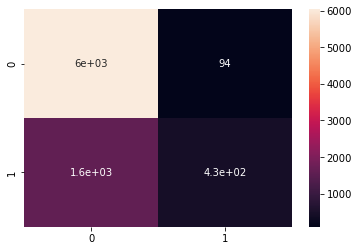

Classification report
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      6131
           1       0.82      0.21      0.34      2010

    accuracy                           0.79      8141
   macro avg       0.81      0.60      0.61      8141
weighted avg       0.80      0.79      0.74      8141



In [33]:
#d) KNN Classifier
m4 = KNeighborsClassifier(n_neighbors=23)
apply_model(m4)

In [ ]:
#e) SVC Classifier
m5 = SVC(kernel='linear',C=1)
apply_model(m5)

#### Model-2 (Feature selection)

In [ ]:
df.corr()['income']

#### Excluded columns
1) Workclass<br>
2) Fnlwgt<br>
3) marital_status<br>
4) relationship<br>
5) race <br>
6) capital_loss<br>

In [ ]:
df.columns

In [ ]:
x = df.iloc[:,[0,4,9,10,12]]
y = df[;,[-1]]

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

In [ ]:
#a) Decision Tree
m6 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=15)
apply_model(m6)

In [ ]:
#b) Random Forest Classifier
m7 = RandomForestClassifier(n_estimators=40,criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m7)

In [ ]:
#c) Logistic Regression
m8 = LogisticRegression(solver='liblinear')
apply_model(m8)

In [ ]:
#d) KNN Classifier
m9 = KNeighborsClassifier(n_neighbors=23)
apply_model(m9)

In [ ]:
#e) SVC Classifier
m10 = SVC(kernel='linear',C=1)
apply_model(m10)